## Predicting Play Store App Category

Given *data about various Google Play store apps*, let's try to predict which **category/genre** a given app belongs to.

We will use a TensorFlow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/lava18/google-play-store-apps

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('archive/googleplaystore.csv')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Preprocessing

In [57]:
df = data.copy()

In [58]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [59]:
# Drop unnecessary columns
unneeded_columns = ['App', 'Genres', 'Current Ver', 'Android Ver']
df = df.drop(unneeded_columns, axis=1)

In [60]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018"
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018"
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018"
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018"
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,"July 25, 2017"
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,"July 6, 2018"
10838,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,"January 20, 2017"
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,"January 19, 2015"


In [61]:
df.isnull().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Last Updated         0
dtype: int64

In [62]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column] == 'object']

In [63]:
get_uniques(df, get_categorical_columns(df))

{'Category': ['ART_AND_DESIGN',
  'AUTO_AND_VEHICLES',
  'BEAUTY',
  'BOOKS_AND_REFERENCE',
  'BUSINESS',
  'COMICS',
  'COMMUNICATION',
  'DATING',
  'EDUCATION',
  'ENTERTAINMENT',
  'EVENTS',
  'FINANCE',
  'FOOD_AND_DRINK',
  'HEALTH_AND_FITNESS',
  'HOUSE_AND_HOME',
  'LIBRARIES_AND_DEMO',
  'LIFESTYLE',
  'GAME',
  'FAMILY',
  'MEDICAL',
  'SOCIAL',
  'SHOPPING',
  'PHOTOGRAPHY',
  'SPORTS',
  'TRAVEL_AND_LOCAL',
  'TOOLS',
  'PERSONALIZATION',
  'PRODUCTIVITY',
  'PARENTING',
  'WEATHER',
  'VIDEO_PLAYERS',
  'NEWS_AND_MAGAZINES',
  'MAPS_AND_NAVIGATION',
  '1.9'],
 'Reviews': ['159',
  '967',
  '87510',
  '215644',
  '167',
  '178',
  '36815',
  '13791',
  '121',
  '13880',
  '8788',
  '44829',
  '4326',
  '1518',
  '55',
  '3632',
  '27',
  '194216',
  '224399',
  '450',
  '654',
  '7699',
  '61',
  '118',
  '192',
  '20260',
  '203',
  '136',
  '223',
  '1120',
  '227',
  '5035',
  '1015',
  '353',
  '564',
  '8145',
  '36639',
  '158',
  '591',
  '117',
  '176',
  '295221',


In [64]:
df[(df['Category'] == '1.9')]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,1.0.19


In [65]:
df = df.drop(10472, axis=0).reset_index(drop=True)

In [66]:
get_uniques(df, get_categorical_columns(df))

{'Category': ['ART_AND_DESIGN',
  'AUTO_AND_VEHICLES',
  'BEAUTY',
  'BOOKS_AND_REFERENCE',
  'BUSINESS',
  'COMICS',
  'COMMUNICATION',
  'DATING',
  'EDUCATION',
  'ENTERTAINMENT',
  'EVENTS',
  'FINANCE',
  'FOOD_AND_DRINK',
  'HEALTH_AND_FITNESS',
  'HOUSE_AND_HOME',
  'LIBRARIES_AND_DEMO',
  'LIFESTYLE',
  'GAME',
  'FAMILY',
  'MEDICAL',
  'SOCIAL',
  'SHOPPING',
  'PHOTOGRAPHY',
  'SPORTS',
  'TRAVEL_AND_LOCAL',
  'TOOLS',
  'PERSONALIZATION',
  'PRODUCTIVITY',
  'PARENTING',
  'WEATHER',
  'VIDEO_PLAYERS',
  'NEWS_AND_MAGAZINES',
  'MAPS_AND_NAVIGATION'],
 'Reviews': ['159',
  '967',
  '87510',
  '215644',
  '167',
  '178',
  '36815',
  '13791',
  '121',
  '13880',
  '8788',
  '44829',
  '4326',
  '1518',
  '55',
  '3632',
  '27',
  '194216',
  '224399',
  '450',
  '654',
  '7699',
  '61',
  '118',
  '192',
  '20260',
  '203',
  '136',
  '223',
  '1120',
  '227',
  '5035',
  '1015',
  '353',
  '564',
  '8145',
  '36639',
  '158',
  '591',
  '117',
  '176',
  '295221',
  '2206',

In [67]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018"
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018"
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018"
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018"
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...
10835,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,"July 25, 2017"
10836,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,"July 6, 2018"
10837,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,"January 20, 2017"
10838,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,"January 19, 2015"


In [68]:
df['Reviews'] = df['Reviews'].astype('int')

In [69]:
(df['Size'] == 'Varies with device').sum()

np.int64(1695)

In [70]:
df['Size'] = df['Size'].apply(lambda x: float(x.replace('M', '')) * 1e6 if 'M' in x else np.nan)

In [71]:
# df['Installs'] = df['Installs'].apply(lambda x: int(x.replace(',', '').replace('+', '')))

In [72]:
df['Price'] = df['Price'].apply(lambda x: float(x.replace('$', '')))

In [75]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0.0,Everyone,"January 7, 2018"
1,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0.0,Everyone,"January 15, 2018"
2,ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0.0,Everyone,"August 1, 2018"
3,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018"
4,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0.0,Everyone,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...
10835,FAMILY,4.5,38,53000000.0,"5,000+",Free,0.0,Everyone,"July 25, 2017"
10836,FAMILY,5.0,4,3600000.0,100+,Free,0.0,Everyone,"July 6, 2018"
10837,MEDICAL,NaN,3,9500000.0,"1,000+",Free,0.0,Everyone,"January 20, 2017"
10838,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,"January 19, 2015"


In [74]:
get_uniques(df, get_categorical_columns(df))

{'Category': ['ART_AND_DESIGN',
  'AUTO_AND_VEHICLES',
  'BEAUTY',
  'BOOKS_AND_REFERENCE',
  'BUSINESS',
  'COMICS',
  'COMMUNICATION',
  'DATING',
  'EDUCATION',
  'ENTERTAINMENT',
  'EVENTS',
  'FINANCE',
  'FOOD_AND_DRINK',
  'HEALTH_AND_FITNESS',
  'HOUSE_AND_HOME',
  'LIBRARIES_AND_DEMO',
  'LIFESTYLE',
  'GAME',
  'FAMILY',
  'MEDICAL',
  'SOCIAL',
  'SHOPPING',
  'PHOTOGRAPHY',
  'SPORTS',
  'TRAVEL_AND_LOCAL',
  'TOOLS',
  'PERSONALIZATION',
  'PRODUCTIVITY',
  'PARENTING',
  'WEATHER',
  'VIDEO_PLAYERS',
  'NEWS_AND_MAGAZINES',
  'MAPS_AND_NAVIGATION'],
 'Installs': ['10,000+',
  '500,000+',
  '5,000,000+',
  '50,000,000+',
  '100,000+',
  '50,000+',
  '1,000,000+',
  '10,000,000+',
  '5,000+',
  '100,000,000+',
  '1,000,000,000+',
  '1,000+',
  '500,000,000+',
  '50+',
  '100+',
  '500+',
  '10+',
  '1+',
  '5+',
  '0+',
  '0'],
 'Type': ['Free', 'Paid', nan],
 'Content Rating': ['Everyone',
  'Teen',
  'Everyone 10+',
  'Mature 17+',
  'Adults only 18+',
  'Unrated'],
 'Las

In [77]:
df[df['Type'].isna()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
9148,FAMILY,NaN,0,NaN,0,NaN,0.0,Everyone 10+,"June 28, 2018"


### Missing values

In [78]:
df = df.drop(9148, axis=0).reset_index(drop=True)

In [79]:
df.isna().sum()

Category             0
Rating            1473
Reviews              0
Size              2010
Installs             0
Type                 0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [80]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0.0,Everyone,"January 7, 2018"
1,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0.0,Everyone,"January 15, 2018"
2,ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0.0,Everyone,"August 1, 2018"
3,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018"
4,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0.0,Everyone,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.5,38,53000000.0,"5,000+",Free,0.0,Everyone,"July 25, 2017"
10835,FAMILY,5.0,4,3600000.0,100+,Free,0.0,Everyone,"July 6, 2018"
10836,MEDICAL,NaN,3,9500000.0,"1,000+",Free,0.0,Everyone,"January 20, 2017"
10837,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,"January 19, 2015"


In [82]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Size'] = df['Size'].fillna(df['Size'].mean())

In [83]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,ART_AND_DESIGN,4.100000,159,1.900000e+07,"10,000+",Free,0.0,Everyone,"January 7, 2018"
1,ART_AND_DESIGN,3.900000,967,1.400000e+07,"500,000+",Free,0.0,Everyone,"January 15, 2018"
2,ART_AND_DESIGN,4.700000,87510,8.700000e+06,"5,000,000+",Free,0.0,Everyone,"August 1, 2018"
3,ART_AND_DESIGN,4.500000,215644,2.500000e+07,"50,000,000+",Free,0.0,Teen,"June 8, 2018"
4,ART_AND_DESIGN,4.300000,967,2.800000e+06,"100,000+",Free,0.0,Everyone,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.500000,38,5.300000e+07,"5,000+",Free,0.0,Everyone,"July 25, 2017"
10835,FAMILY,5.000000,4,3.600000e+06,100+,Free,0.0,Everyone,"July 6, 2018"
10836,MEDICAL,4.191757,3,9.500000e+06,"1,000+",Free,0.0,Everyone,"January 20, 2017"
10837,BOOKS_AND_REFERENCE,4.500000,114,2.227054e+07,"1,000+",Free,0.0,Mature 17+,"January 19, 2015"


In [84]:
df.isna().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
dtype: int64

### Encoding

In [85]:
get_uniques(df, get_categorical_columns(df))

{'Category': ['ART_AND_DESIGN',
  'AUTO_AND_VEHICLES',
  'BEAUTY',
  'BOOKS_AND_REFERENCE',
  'BUSINESS',
  'COMICS',
  'COMMUNICATION',
  'DATING',
  'EDUCATION',
  'ENTERTAINMENT',
  'EVENTS',
  'FINANCE',
  'FOOD_AND_DRINK',
  'HEALTH_AND_FITNESS',
  'HOUSE_AND_HOME',
  'LIBRARIES_AND_DEMO',
  'LIFESTYLE',
  'GAME',
  'FAMILY',
  'MEDICAL',
  'SOCIAL',
  'SHOPPING',
  'PHOTOGRAPHY',
  'SPORTS',
  'TRAVEL_AND_LOCAL',
  'TOOLS',
  'PERSONALIZATION',
  'PRODUCTIVITY',
  'PARENTING',
  'WEATHER',
  'VIDEO_PLAYERS',
  'NEWS_AND_MAGAZINES',
  'MAPS_AND_NAVIGATION'],
 'Installs': ['10,000+',
  '500,000+',
  '5,000,000+',
  '50,000,000+',
  '100,000+',
  '50,000+',
  '1,000,000+',
  '10,000,000+',
  '5,000+',
  '100,000,000+',
  '1,000,000,000+',
  '1,000+',
  '500,000,000+',
  '50+',
  '100+',
  '500+',
  '10+',
  '1+',
  '5+',
  '0+'],
 'Type': ['Free', 'Paid'],
 'Content Rating': ['Everyone',
  'Teen',
  'Everyone 10+',
  'Mature 17+',
  'Adults only 18+',
  'Unrated'],
 'Last Updated': 

In [90]:
df['Month'] = df['Last Updated'].apply(lambda x: re.search('^[^\s]+', x).group(0))

In [91]:
df['Year'] = df['Last Updated'].apply(lambda x: re.search('[^\s]+$', x).group(0))

In [92]:
df = df.drop('Last Updated', axis=1)

In [93]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Month,Year
0,ART_AND_DESIGN,4.100000,159,1.900000e+07,"10,000+",Free,0.0,Everyone,January,2018
1,ART_AND_DESIGN,3.900000,967,1.400000e+07,"500,000+",Free,0.0,Everyone,January,2018
2,ART_AND_DESIGN,4.700000,87510,8.700000e+06,"5,000,000+",Free,0.0,Everyone,August,2018
3,ART_AND_DESIGN,4.500000,215644,2.500000e+07,"50,000,000+",Free,0.0,Teen,June,2018
4,ART_AND_DESIGN,4.300000,967,2.800000e+06,"100,000+",Free,0.0,Everyone,June,2018
...,...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.500000,38,5.300000e+07,"5,000+",Free,0.0,Everyone,July,2017
10835,FAMILY,5.000000,4,3.600000e+06,100+,Free,0.0,Everyone,July,2018
10836,MEDICAL,4.191757,3,9.500000e+06,"1,000+",Free,0.0,Everyone,January,2017
10837,BOOKS_AND_REFERENCE,4.500000,114,2.227054e+07,"1,000+",Free,0.0,Mature 17+,January,2015


In [94]:
label_encoder = LabelEncoder()

df['Category'] = label_encoder.fit_transform(df['Category'])
category_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
category_mappings

{0: 'ART_AND_DESIGN',
 1: 'AUTO_AND_VEHICLES',
 2: 'BEAUTY',
 3: 'BOOKS_AND_REFERENCE',
 4: 'BUSINESS',
 5: 'COMICS',
 6: 'COMMUNICATION',
 7: 'DATING',
 8: 'EDUCATION',
 9: 'ENTERTAINMENT',
 10: 'EVENTS',
 11: 'FAMILY',
 12: 'FINANCE',
 13: 'FOOD_AND_DRINK',
 14: 'GAME',
 15: 'HEALTH_AND_FITNESS',
 16: 'HOUSE_AND_HOME',
 17: 'LIBRARIES_AND_DEMO',
 18: 'LIFESTYLE',
 19: 'MAPS_AND_NAVIGATION',
 20: 'MEDICAL',
 21: 'NEWS_AND_MAGAZINES',
 22: 'PARENTING',
 23: 'PERSONALIZATION',
 24: 'PHOTOGRAPHY',
 25: 'PRODUCTIVITY',
 26: 'SHOPPING',
 27: 'SOCIAL',
 28: 'SPORTS',
 29: 'TOOLS',
 30: 'TRAVEL_AND_LOCAL',
 31: 'VIDEO_PLAYERS',
 32: 'WEATHER'}

In [95]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Month,Year
0,0,4.100000,159,1.900000e+07,"10,000+",Free,0.0,Everyone,January,2018
1,0,3.900000,967,1.400000e+07,"500,000+",Free,0.0,Everyone,January,2018
2,0,4.700000,87510,8.700000e+06,"5,000,000+",Free,0.0,Everyone,August,2018
3,0,4.500000,215644,2.500000e+07,"50,000,000+",Free,0.0,Teen,June,2018
4,0,4.300000,967,2.800000e+06,"100,000+",Free,0.0,Everyone,June,2018
...,...,...,...,...,...,...,...,...,...,...
10834,11,4.500000,38,5.300000e+07,"5,000+",Free,0.0,Everyone,July,2017
10835,11,5.000000,4,3.600000e+06,100+,Free,0.0,Everyone,July,2018
10836,20,4.191757,3,9.500000e+06,"1,000+",Free,0.0,Everyone,January,2017
10837,3,4.500000,114,2.227054e+07,"1,000+",Free,0.0,Mature 17+,January,2015


In [96]:
def binary_encoding(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encoding(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

In [97]:
get_uniques(df, get_categorical_columns(df))

{'Installs': ['10,000+',
  '500,000+',
  '5,000,000+',
  '50,000,000+',
  '100,000+',
  '50,000+',
  '1,000,000+',
  '10,000,000+',
  '5,000+',
  '100,000,000+',
  '1,000,000,000+',
  '1,000+',
  '500,000,000+',
  '50+',
  '100+',
  '500+',
  '10+',
  '1+',
  '5+',
  '0+'],
 'Type': ['Free', 'Paid'],
 'Content Rating': ['Everyone',
  'Teen',
  'Everyone 10+',
  'Mature 17+',
  'Adults only 18+',
  'Unrated'],
 'Month': ['January',
  'August',
  'June',
  'March',
  'April',
  'September',
  'July',
  'October',
  'November',
  'May',
  'December',
  'February'],
 'Year': ['2018',
  '2017',
  '2014',
  '2016',
  '2015',
  '2013',
  '2012',
  '2011',
  '2010']}

In [105]:
installs_ordering = ['0+',
 '1+',
 '5+',
 '10+',
 '50+',
 '100+',
 '500+', 
 '1,000+',
 '5,000+',
 '10,000+',
 '50,000+',
 '100,000+',
 '500,000+',
 '1,000,000+', 
 '5,000,000+',
 '10,000,000+', 
 '50,000,000+',
 '100,000,000+',
 '500,000,000+',
 '1,000,000,000+']

In [106]:
rating_ordering = [
    'Everyone',
    'Everyone 10+',
    'Teen',
    'Mature 17+',
    'Adults only 18+',
    'Unrated'
]

month_ordering = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
]

In [107]:
df = binary_encoding(df, 'Type', 'Paid')

In [108]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Month,Year
0,0,4.100000,159,1.900000e+07,"10,000+",0,0.0,Everyone,January,2018
1,0,3.900000,967,1.400000e+07,"500,000+",0,0.0,Everyone,January,2018
2,0,4.700000,87510,8.700000e+06,"5,000,000+",0,0.0,Everyone,August,2018
3,0,4.500000,215644,2.500000e+07,"50,000,000+",0,0.0,Teen,June,2018
4,0,4.300000,967,2.800000e+06,"100,000+",0,0.0,Everyone,June,2018
...,...,...,...,...,...,...,...,...,...,...
10834,11,4.500000,38,5.300000e+07,"5,000+",0,0.0,Everyone,July,2017
10835,11,5.000000,4,3.600000e+06,100+,0,0.0,Everyone,July,2018
10836,20,4.191757,3,9.500000e+06,"1,000+",0,0.0,Everyone,January,2017
10837,3,4.500000,114,2.227054e+07,"1,000+",0,0.0,Mature 17+,January,2015


In [110]:
df = ordinal_encoding(df, 'Installs', installs_ordering)

In [112]:
df = ordinal_encoding(df, 'Content Rating', rating_ordering)
df = ordinal_encoding(df, 'Month', month_ordering)

In [113]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Month,Year
0,0,4.100000,159,1.900000e+07,9,0,0.0,0,0,2018
1,0,3.900000,967,1.400000e+07,12,0,0.0,0,0,2018
2,0,4.700000,87510,8.700000e+06,14,0,0.0,0,7,2018
3,0,4.500000,215644,2.500000e+07,16,0,0.0,2,5,2018
4,0,4.300000,967,2.800000e+06,11,0,0.0,0,5,2018
...,...,...,...,...,...,...,...,...,...,...
10834,11,4.500000,38,5.300000e+07,8,0,0.0,0,6,2017
10835,11,5.000000,4,3.600000e+06,5,0,0.0,0,6,2018
10836,20,4.191757,3,9.500000e+06,7,0,0.0,0,0,2017
10837,3,4.500000,114,2.227054e+07,7,0,0.0,3,0,2015


### Splitting and Scaling

In [114]:
y = df['Category'].copy()
X = df.drop('Category', axis=1).copy()

In [115]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Month,Year
0,-0.191598,-0.151664,-1.601487e-01,-0.416294,0.0,-0.064419,-0.464329,-2.103008,0.545311
1,-0.609215,-0.151388,-4.049840e-01,0.343721,0.0,-0.064419,-0.464329,-2.103008,0.545311
2,1.061256,-0.121828,-6.645094e-01,0.850398,0.0,-0.064419,-0.464329,0.611870,0.545311
3,0.643638,-0.078063,1.336536e-01,1.357075,0.0,-0.064419,1.850693,-0.163809,0.545311
4,0.226020,-0.151388,-9.534151e-01,0.090383,0.0,-0.064419,-0.464329,-0.163809,0.545311
...,...,...,...,...,...,...,...,...,...
10834,0.643638,-0.151705,1.504731e+00,-0.669633,0.0,-0.064419,-0.464329,0.224030,-0.363038
10835,1.687682,-0.151717,-9.142414e-01,-1.429648,0.0,-0.064419,-0.464329,0.224030,0.545311
10836,0.000000,-0.151717,-6.253358e-01,-0.922971,0.0,-0.064419,-0.464329,-2.103008,-0.363038
10837,0.643638,-0.151679,-1.824165e-16,-0.922971,0.0,-0.064419,3.008204,-2.103008,-2.179735


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

### Training

In [117]:
X.shape

(10839, 9)

In [118]:
inputs = tf.keras.Input(shape=(9, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(33, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 64
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1837 - loss: 3.1125 - val_accuracy: 0.1930 - val_loss: 2.9345 - learning_rate: 0.0010
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2264 - loss: 2.8171 - val_accuracy: 0.2062 - val_loss: 2.8525 - learning_rate: 0.0010
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2407 - loss: 2.7488 - val_accuracy: 0.2141 - val_loss: 2.8149 - learning_rate: 0.0010
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2404 - loss: 2.7129 - val_accuracy: 0.2101 - val_loss: 2.7900 - learning_rate: 0.0010
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2401 - loss: 2.6900 - val_accuracy: 0.2174 - val_loss: 2.7757 - learning_rate: 0.0010
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2429 - loss: 2.6751 - val_accuracy: 0.2181 - val_loss: 2.7646 - learning_rate: 0.0010
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2452 - loss: 2.6599 - val_acc

### Results

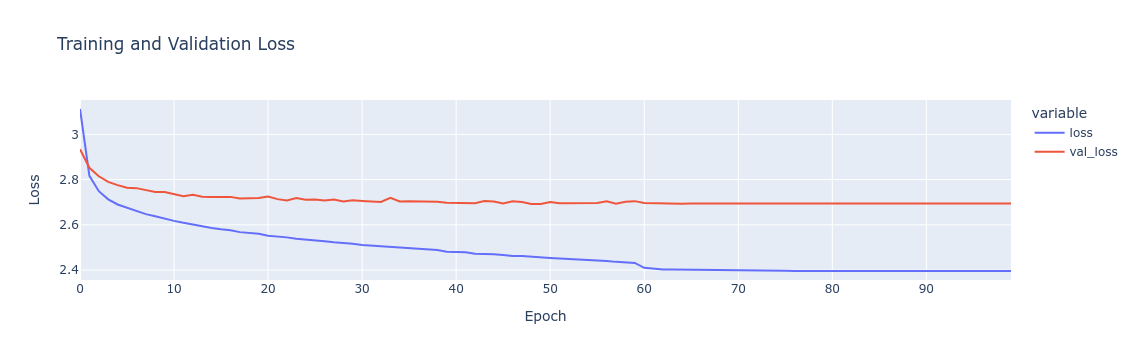

In [119]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index':'Epoch', 'value':'Loss'},
    title="Training and Validation Loss"
)

fig.show()

In [120]:
model.evaluate(X_test, y_test)

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2617 - loss: 2.7058


[2.705777168273926, 0.2616851031780243]